<a href="https://colab.research.google.com/github/jamespan1118/Xenopus_signal_processing/blob/main/Noise_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#importing libraries and packages
import librosa
from librosa import display
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.io.wavfile import write
import numpy as np
import scipy

##Step 1: Visualizing the waveplots

Before implementing processing procedures, we visualize waveplots of 
1. Noise
2. Noise+Male
3. Noise+Female 

so that we can intuitively understand the data

In [2]:
#loading the noise file
file_path = "/content/01-F818D-F8387-220616_0456_8min_selection (1)_noise.wav"
samples_noise, sampling_rate = librosa.load(file_path,sr=44100)

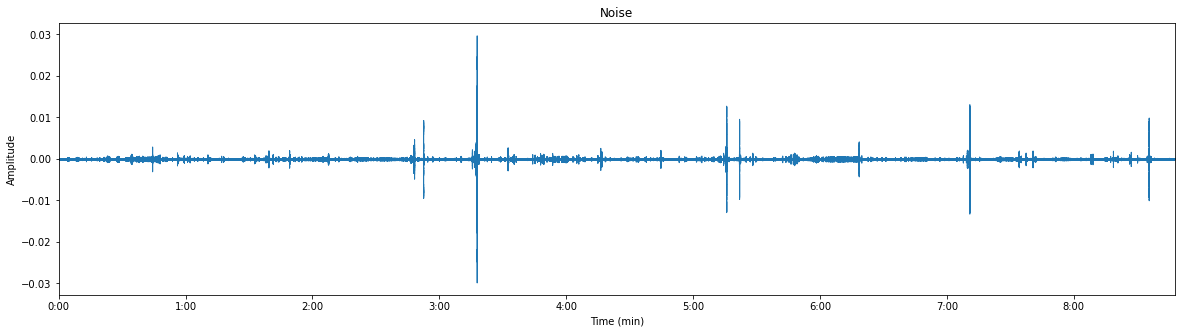

In [3]:
#plotting the audio data in time domain
plt.figure(figsize=(20,5))
librosa.display.waveplot(y=samples_noise,sr=sampling_rate)
plt.title("Noise")
plt.xlabel("Time (min)")
plt.ylabel("Amplitude")
plt.show()

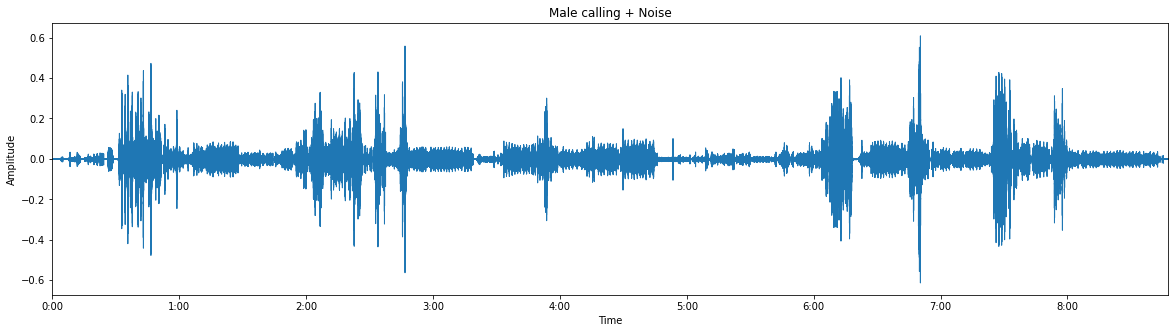

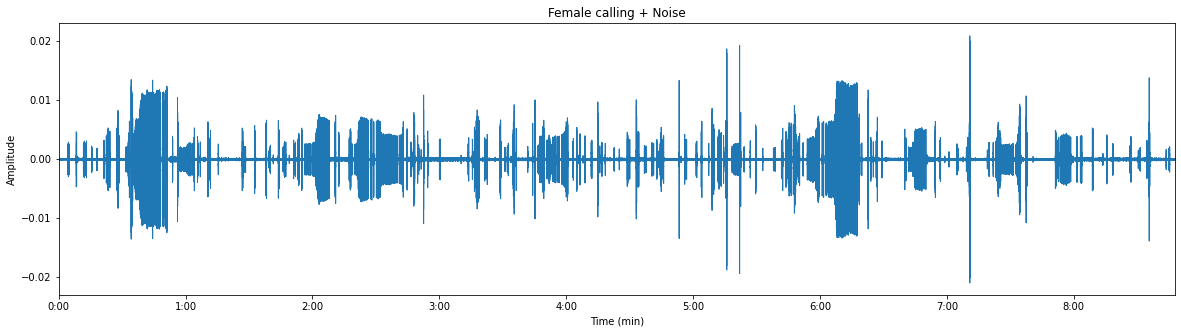

In [4]:
#plotting the waveplot of female and male for visual comparison
file_path_male = '/content/01-F818D-F8387-220616_0456_8min_selection (1)_male.wav'
file_path_female = '/content/01-F818D-F8387-220616_0456_8min_selection (1)_female.wav'
samples_male, sampling_rate = librosa.load(file_path_male,sr=44100)
samples_female, sampling_rate = librosa.load(file_path_female,sr=44100)

plt.figure(figsize=(20,5))
librosa.display.waveplot(y=samples_male,sr=sampling_rate)
plt.title('Male calling + Noise')
plt.ylabel("Amplitude")
plt.show()

plt.figure(figsize=(20,5))
librosa.display.waveplot(y=samples_female,sr=sampling_rate)
plt.title('Female calling + Noise')
plt.xlabel("Time (min)")
plt.ylabel("Amplitude")
plt.show()

## Step 2: Identifying the peaks in the Noise plot

In [5]:
#smooth the function
noise_smoothed = gaussian_filter1d(abs(samples_noise),100)

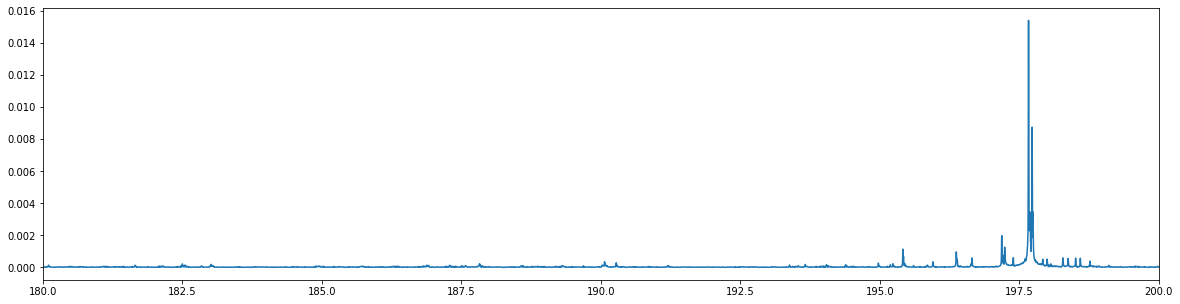

In [6]:
duration = len(samples_noise)/sampling_rate
x_time = np.arange(0,duration,1/sampling_rate)
plt.figure(figsize=(20,5))
plt.plot(x_time,noise_smoothed)
plt.xlim(180,200)
plt.show()

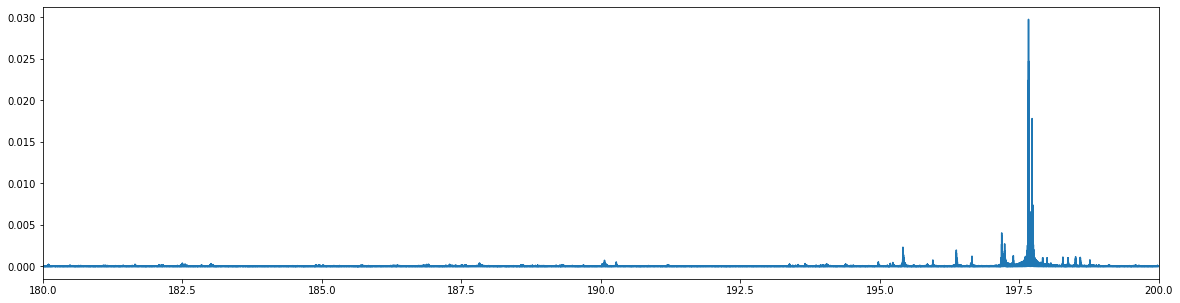

In [7]:
#compare against the original data
plt.figure(figsize=(20,5))
plt.plot(x_time,abs(samples_noise))
plt.xlim(180,200)
plt.show()

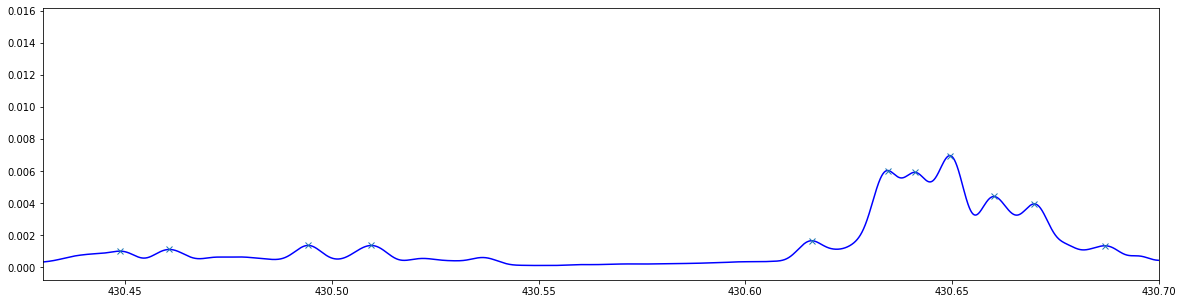

In [8]:
#identify peaks
noise_peaks, _ = scipy.signal.find_peaks(noise_smoothed,height=0.001)
plt.figure(figsize=(20,5))
plt.plot(x_time,noise_smoothed,color = "blue")
plt.plot(x_time[noise_peaks],noise_smoothed[noise_peaks],'x')
plt.xlim(430.43,430.7)
plt.show()

In [9]:
noise_peaks

array([ 1948478,  4374094,  4374358,  4805078,  7396064,  7410188,
        7410884,  7411208,  7411549,  7599691,  8617855,  8695943,
        8698256,  8717128,  8718314,  8718861,  8719401,  8719954,
        8720654,  9361714,  9362067,  9362449, 11295096, 11317642,
       12548455, 12549149, 13904001, 13904507, 13906235, 13906794,
       13907161, 13907481, 13907863, 13908778, 13909250, 13910128,
       13915871, 13919587, 13920377, 13921161, 13921641, 14189467,
       14189781, 16685288, 16685701, 18939412, 18948675, 18982786,
       18983315, 18984795, 18985469, 18990167, 18990979, 18991266,
       18991642, 18992111, 18992542, 18993295, 20024516, 20024835,
       20310247, 21987005, 22730797, 22732715, 22733171])

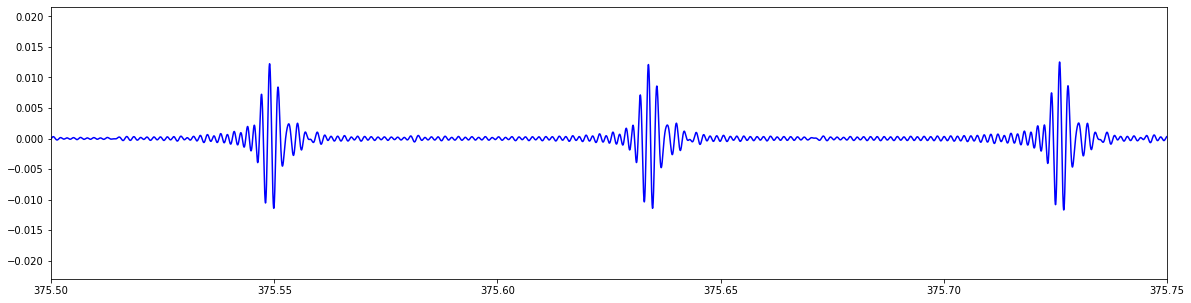

In [10]:
#female+noise sample with possible noise peak locations marked
plt.figure(figsize=(20,5))
plt.plot(x_time,samples_female,color = "blue")
plt.plot(x_time[noise_peaks],noise_smoothed[noise_peaks],'x')
plt.xlim(375.5,375.75)
plt.show()

In [11]:
#remove +/-50 samples within the range of the peak 
#in female+noise and male+noise audio samples
for i in noise_peaks:
  samples_female[(i-100):(i+100)]=0

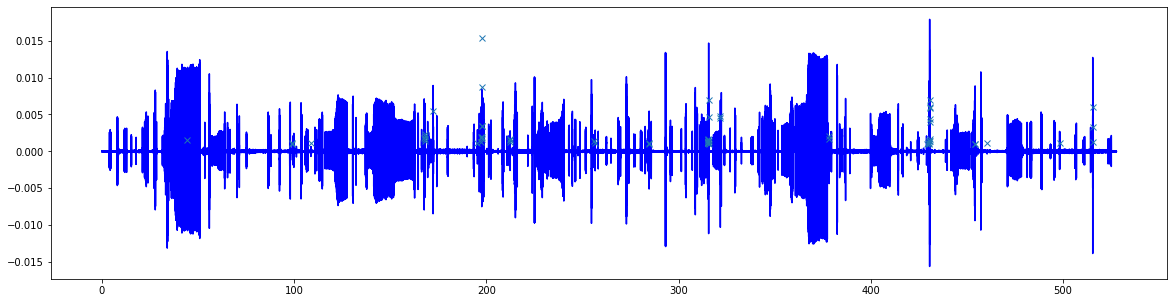

In [18]:
#female+noise sample with possible noise peak locations marked
plt.figure(figsize=(20,5))
plt.plot(x_time,samples_female,color = "blue")
plt.plot(x_time[noise_peaks],noise_smoothed[noise_peaks],'x')
#plt.xlim(430.43,430.7)
plt.show()

In [16]:
write("/content/01-F818D-F8387-220616_0456_8min_selection (1)_female_filtered.wav",sampling_rate,samples_female)

In [ ]:
def noise_filter(noise_file,call_with_noise_file,sigma=100,sampling_rate=44100,peak_height=0.001):
  #load audio files
  samples_noise, sampling_rate = librosa.load(noise_file,sr=sampling_rate)
  samples_call_with_noise, sampling_rate = librosa.load(call_with_noise_file,sr=sampling_rate)
  #get noise peaks
  noise_smoothed = gaussian_filter1d(abs(samples_noise),sigma)
  noise_peaks, _ = scipy.signal.find_peaks(noise_smoothed,height=peak_height)
  #filtering
  for i in noise_peaks:
    samples_call_with_noise[(i-sigma/2):(i+sigma/2)]=0
  return samples_call_with_noise